# Effects of selective borrower, loan attributes and time series events on Prosper loan listing distributions
## by Audrey S Tan

## Investigation Overview

In this presentation, we will look at the effects of selective borrower, loan attributes and time series events on Prosper loan listing distributions between 1 July 2008 and 31 December 2009.

## Dataset Overview

We will analyze data from Prosper, an online peer-to-peer lending business. The original data contains loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, but we will focus on a subset of 6,123 listings between 1 July 2008 and 31 December 2009, and examine selective attributes on borrower and loans, time series events to see their effects on loan listing distributions. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
sb.set_style('dark', {'xtick.bottom': True})
pcolor=sb.color_palette('Dark2', 8)[0]
plt.rcParams['figure.figsize'] = (11.69, 8.27)

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])

In [4]:
df2=df[['CrRanking','CrRankType',
        'ListingCategory (numeric)','StatedMonthlyIncome',
        'LoanOriginalAmount','ProsperPrincipalBorrowed',
        'BorrowerAPR']].copy()

# Convert APR to percent
df2['APRPct'] = df2.BorrowerAPR.apply(lambda x: x * 100)
df2.CrRankType.replace({'CreditGrade':'Pre 2009-07','ProsperRating (Alpha)':'Post 2009-07'},inplace=True)

# Map numeric Listing Category codes to descriptive names  
df2.rename(columns={'ListingCategory (numeric)': 'LoanCat'},inplace=True)
df2.LoanCat = df2.LoanCat.astype(str)
df2.LoanCat.replace({'1': 'Debt Consolidation', '2': 'Home Improvement',
                     '3': 'Business', '4': 'Personal', '5': 'Student',
                     '6': 'Auto', '7': 'Other'},inplace=True) 

em_cnt=df.EmploymentStatus.value_counts()
em_pct=df.EmploymentStatus.value_counts()/df.shape[0]*100

ls_cnt=df.LoanStatus.value_counts()
ls_pct=df.LoanStatus.value_counts()/df.shape[0]*100

st_cnt=df.BorrowerState.value_counts()[0:20]
st_pct=(df.BorrowerState.value_counts()/df.shape[0]*100)[0:20]

cr_cnt=df.CrRanking.value_counts().loc[[i for i in ['AA','A','B','C','D','E','HR']]]
cr_pct=cr_cnt/df.shape[0]*100

## Univariate view of selective borrower and loan attributes on listing distributions  
For distributions associated with borrower attributes, borrowers who were professionals in full time employment from CA top the highest listing frequency. However, the top listing frequency by credit ranking is C and not AA.

For distributions associated with loan attributes, debt consolidation has the top frequency, so are listings in Completed status and listing amounts between \$1,000 and \$3,000.   

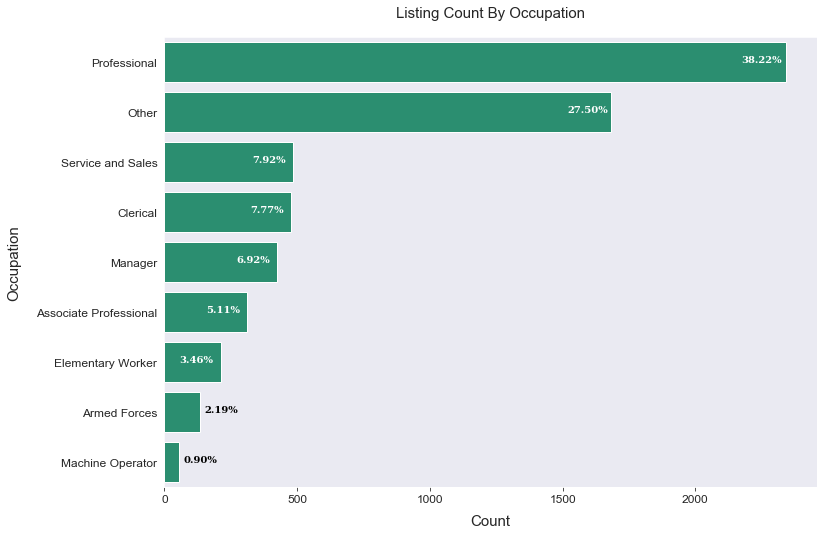

In [5]:
oc_cnt=df.Occupation.value_counts()
oc_pct=df.Occupation.value_counts()/df.shape[0]*100

#plt.figure(figsize=[ 8, 5])
ax = sb.countplot(y='Occupation', data=df, order=df.Occupation.value_counts().index, color=pcolor)

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = oc_cnt[label.get_text()]
    pct = oc_pct[label.get_text()]
    if pct>=3:
        plt.text(cnt-90, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(cnt+80, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
        
plt.ylabel('Occupation', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count By Occupation', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

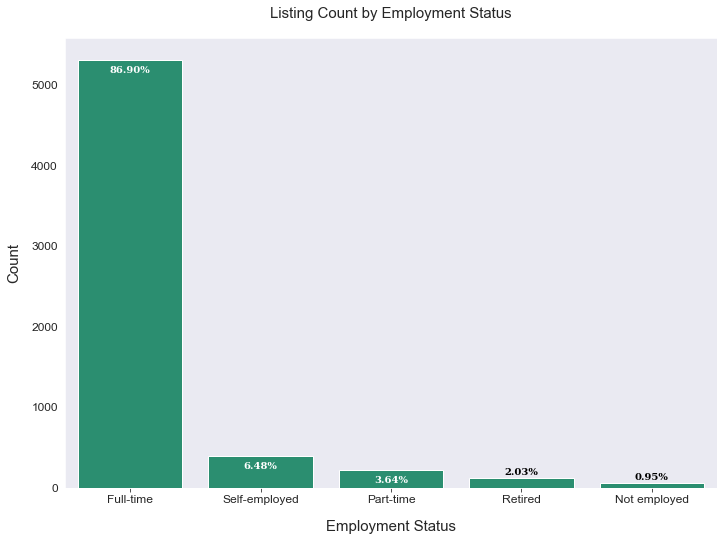

In [6]:
ax = sb.countplot(x='EmploymentStatus',data=df, order=df.EmploymentStatus.value_counts().index,color=pcolor)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    cnt = em_cnt[label.get_text()]
    pct = em_pct[label.get_text()]
    if pct>=3:
        plt.text(loc,cnt-170,'{:0.2f}%'.format(pct),ha='center',
                 color = 'w',fontweight='bold',fontfamily='serif')
    else:
        plt.text(loc,cnt+40,'{:0.2f}%'.format(pct),ha = 'center',
                 color='k',fontweight='bold',fontfamily='serif')
        
plt.xlabel('Employment Status', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Employment Status', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);


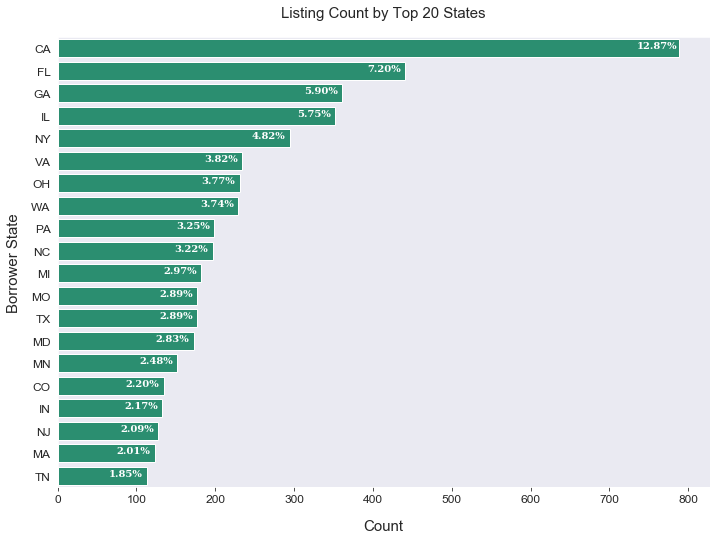

In [7]:
top_st20=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:20])]
sb.countplot(data=top_st20,y='BorrowerState', color=pcolor, order=top_st20.BorrowerState.value_counts().index);

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = st_cnt[label.get_text()]
    pct = st_pct[label.get_text()]
    if pct>=1.8:
        plt.text(cnt-27, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif', fontsize=10)
    else:
        plt.text(cnt+27, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif', fontsize=10)

plt.xlabel('Count', labelpad=15, fontsize=15)
plt.ylabel('Borrower State', labelpad=10, fontsize=15)
plt.title('Listing Count by Top 20 States', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

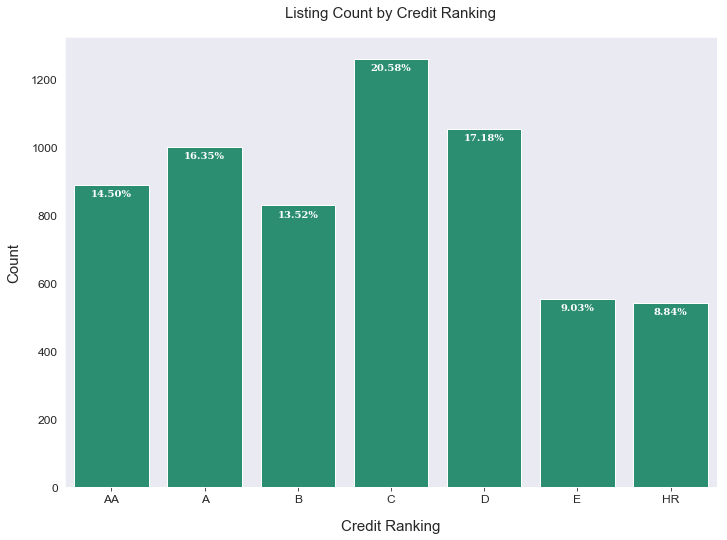

In [8]:
ax = sb.countplot(x='CrRanking', data=df2, order=['AA','A','B','C','D','E','HR'], 
                  color=pcolor)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    cnt = cr_cnt[label.get_text()]
    pct = cr_pct[label.get_text()]
    if pct>5:
        plt.text(loc,cnt-33,'{:0.2f}%'.format(pct),ha='center',
                 color = 'w',fontweight='bold',fontfamily='serif')
    else:
        plt.text(loc,cnt,'{:0.2f}%'.format(pct),ha = 'center',
                 color='k',fontweight='bold',fontfamily='serif')
        
plt.xlabel('Credit Ranking', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Credit Ranking', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

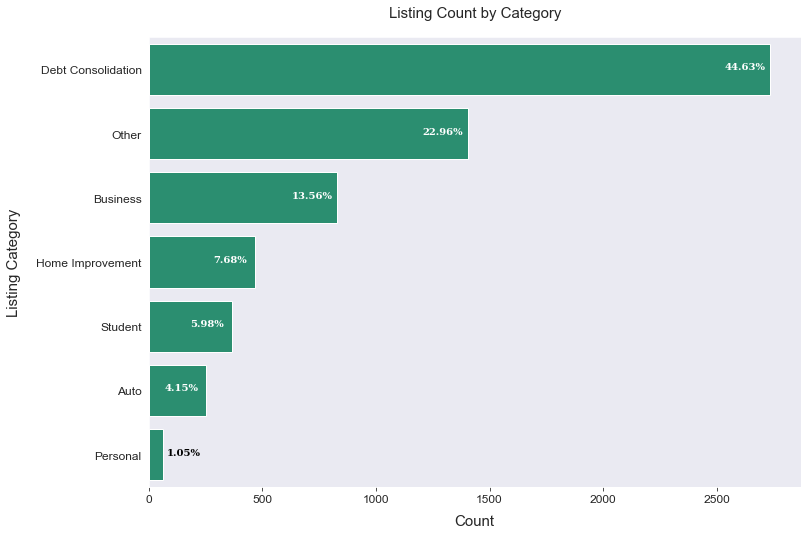

In [9]:
lc_cnt=df2.LoanCat.value_counts()
lc_pct=df2.LoanCat.value_counts()/df.shape[0]*100

#plt.figure(figsize=[ 8, 5])
ax = sb.countplot(y='LoanCat', data=df2, order=df2.LoanCat.value_counts().index, color=pcolor)

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = lc_cnt[label.get_text()]
    pct = lc_pct[label.get_text()]
    if pct>=4:
        plt.text(cnt-110, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(cnt+90, loc, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
        
plt.ylabel('Listing Category', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Category', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

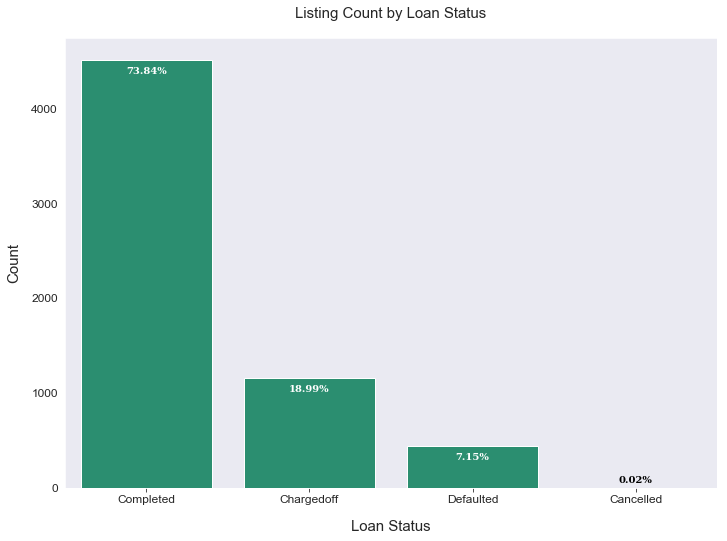

In [10]:
ax = sb.countplot(x='LoanStatus', data=df, order=df.LoanStatus.value_counts().index, color=pcolor)

locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    cnt = ls_cnt[label.get_text()]
    pct = ls_pct[label.get_text()]
    if pct>5:
        plt.text(loc, cnt-150, '{:0.2f}%'.format(pct), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif')
    else:
        plt.text(loc, cnt+50, '{:0.2f}%'.format(pct), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif')
plt.xlabel('Loan Status', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Loan Status', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

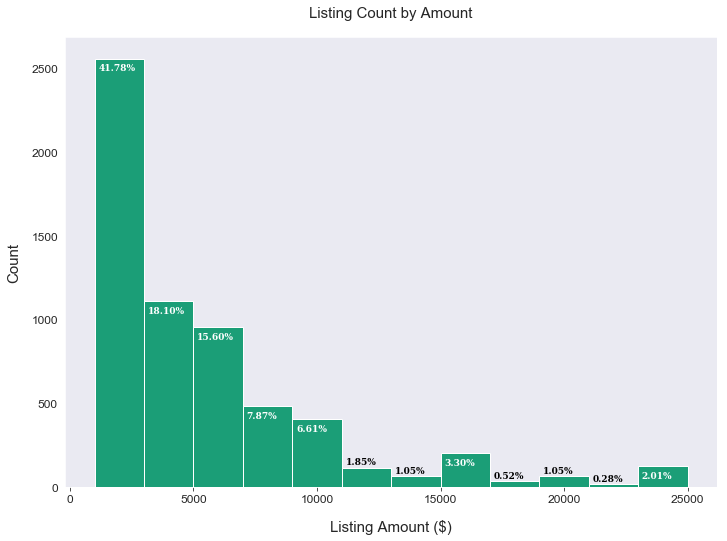

In [11]:
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1000, 2000)
n,bins,rect = plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=pcolor)
pts=sum(n)
          
plt.xlabel('Listing Amount ($)', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=10, fontsize=15)
plt.title('Listing Count by Amount', pad=20, fontsize=15);

ax = plt.gca()
for ind in range(len(rect)):
    loc=bins[ind]
    cnt=n[ind]
    pct=int(n[ind])/pts*100
    if pct>2:
        ax.text(loc+150,cnt-70,'{:0.2f}%'.format(pct), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize=9)
    else:
        ax.text(loc+150,cnt+20,'{:0.2f}%'.format(pct), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize=9) 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

## Bivariate view of selective borrower and loan attributes on listing distributions

The correlations between listing frequency, borrower and loan attributes observed in previous visualizations may remain the same, but when another attribute is added, we see differences in the distributions. 

For examples, adding the attribute _top 5 borrower state_ to borrower profession distribution, we see a difference in the distribution, where professional job holders no longer hold the highest frequency. Similarly, the distribution of credit ranking no longer has C and D ratings in the first and second spots in listing frequency. 

When listing amount and credit ranking attributes are viewed together, AA, A and B ratings hold the top 3 spots in listing amount. The same trend of small listing amount prevails, with the median listing amount in each credit ranking remain below \$7,500.      

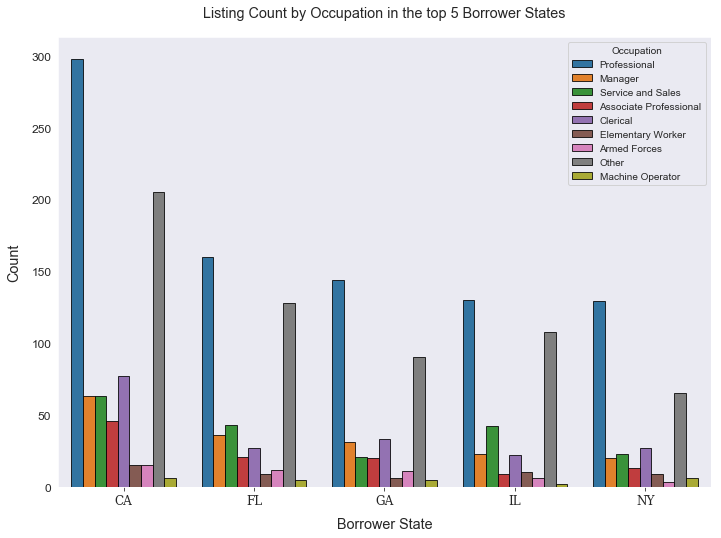

In [12]:
top_st5=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]

plt.figure(figsize=(11.69, 8.27))
sb.countplot(data=top_st5, x='BorrowerState',palette='tab10',
             hue='Occupation', edgecolor='k', linewidth=0.8,
             order=df.BorrowerState.value_counts().index[0:5])

locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')
plt.xlabel('Borrower State', labelpad=10, fontsize='x-large')
plt.ylabel('Count', labelpad=10, fontsize='x-large')
plt.title('Listing Count by Occupation in the top 5 Borrower States',pad=20, fontsize='x-large');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

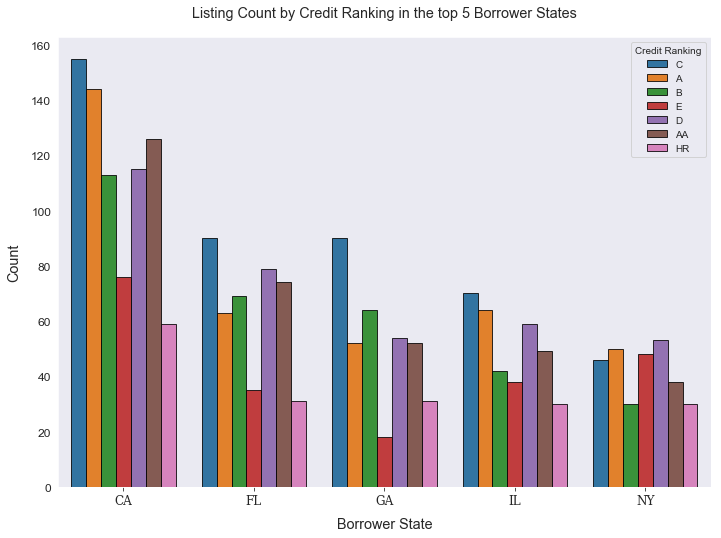

In [13]:
top_st5=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]

plt.figure(figsize=(11.69, 8.27))

sb.countplot(data=top_st5, x='BorrowerState',
             hue='CrRanking', edgecolor='k', linewidth=0.8,
             order=df.BorrowerState.value_counts().index[0:5])

plt.legend(title='Credit Ranking');
locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')
plt.xlabel('Borrower State', labelpad=10, fontsize='x-large')
plt.ylabel('Count', labelpad=10, fontsize='x-large')
plt.title('Listing Count by Credit Ranking in the top 5 Borrower States',pad=20, fontsize='x-large');
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

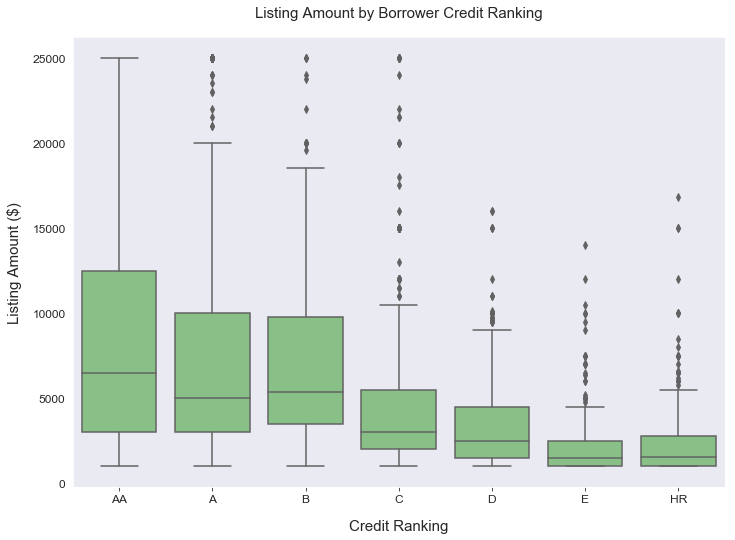

In [14]:
ax = sb.boxplot(x='CrRanking', y='LoanOriginalAmount', 
                 data=df2, color=sb.color_palette('Accent', 8)[0], 
                 order=['AA','A','B','C','D','E','HR'],
                 orient='v');

plt.xlabel('Credit Ranking', labelpad=15, fontsize=15)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=15)
plt.title('Listing Amount by Borrower Credit Ranking', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

## Multivariate view of selective borrower, loan attributes and time series events on listing distributions

Adding Borrower APR attribute to the Listing Amount and Credit Ranking distribution reveals varying concentrations of listing amounts at different APR rates. This was not visible in the previous visualization. 

Viewing listing dates along with total principal borrowed and delinquent amount between 1 July 2008 and 31 Decemeber 2009, we see a busy period of loans borrowed and in delinquent between July and November 2008, a quiet period, then a revival period after July 2009. The trend and timing coincide with the _**2008 Great Recession**_, _**SEC cease and desist order**_ on Prosper in November 2008, and its _**post 2009 SEC Relaunch**_ events, confirming the effect of the three events on Prosper listing activities. 

Comparing listing amount distribution by credit ranking in the pre and post July 2009 periods, we see listing amount distribution across credit rankings is much more pronounced in the pre than in the post July 2009 period.

Comparing listing amount distribution by listing category in the pre and post July 2009 periods, we see post July 2009 period has no listing amount in _**Personal**_ category, the median listing amount in _**Debt Consolidation**_ category remains constant and decreases across _**Business**_, _**Other**_, _**Home Improvement**_, _**Student**_ and _**Auto**_ categories.

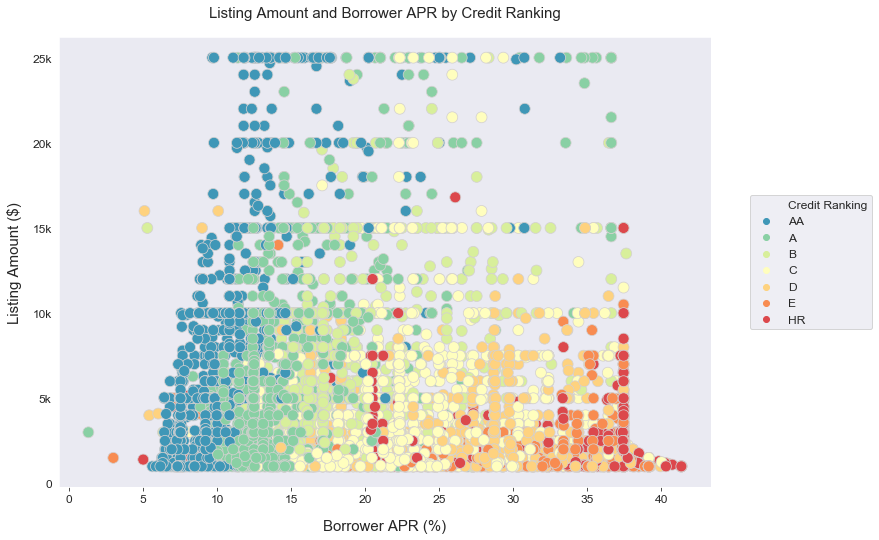

In [15]:
ax = sb.scatterplot(x='APRPct', y='LoanOriginalAmount', data=df2,
                    hue='CrRanking', s=120, edgecolor='#d4d1d1', 
                    hue_order=['AA','A','B','C','D','E','HR'],
                    palette='Spectral_r'); 

plt.legend(loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large').texts[0].set_text('Credit Ranking');
plt.yticks([0,5000,10000,15000,20000,25000],
           ['0','5k','10k','15k','20k','25k'])
plt.xlabel('Borrower APR (%)', labelpad=15, fontsize=15)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=15)
plt.title('Listing Amount and Borrower APR by Credit Ranking', pad=20, fontsize=15);

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

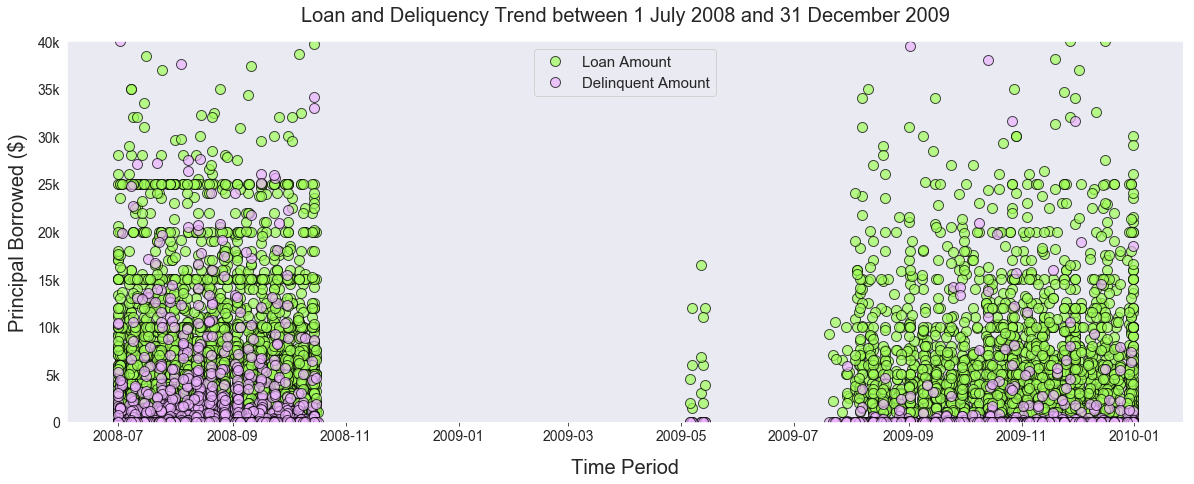

In [16]:
sb.set_style('dark', {'xtick.bottom': True})
period = pd.to_datetime(df.LoanOriginationDate).dt.date

fig, ax = plt.subplots(figsize=(20,7))
plt.plot_date(period, df.ProsperPrincipalBorrowed, color='#A1FE5A',
              marker='o', markeredgecolor='k', linewidth=0.5,
              ms=10, alpha=0.7, label='Loan Amount')
plt.plot_date(period, df.AmountDelinquent, color='#ECB3FF', linewidth=0.5,
              marker='o', markeredgecolor='k', 
              ms=10, alpha=0.7, label='Delinquent Amount')

for tick in ax.get_xticklabels():
    tick.set_fontsize(14)

for tick in ax.get_yticklabels():                       
    tick.set_fontsize(14)

plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000],
           ['0','5k','10k','15k','20k','25k','30k','35k','40k'])    
plt.ylim((0,40000))
plt.legend(fontsize=15)
plt.xlabel('Time Period', labelpad=15, fontsize=20)
plt.ylabel('Principal Borrowed ($)', labelpad=10, fontsize=20)
plt.title('Loan and Deliquency Trend between 1 July 2008 and 31 December 2009', pad=20, fontsize=20);

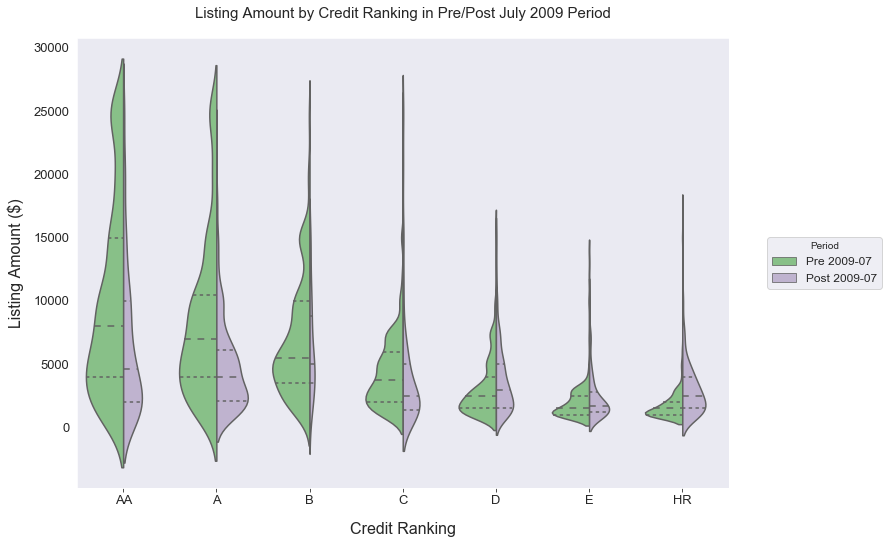

In [17]:
ax = sb.violinplot(x='CrRanking', y='LoanOriginalAmount', hue='CrRankType',
                   data=df2, palette='Accent', split=True, inner='quartile',
                   order=['AA','A','B','C','D','E','HR'], scale='count');

plt.legend(title='Period', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');           
    
plt.xlabel('Credit Ranking', labelpad=15, fontsize=16)
plt.ylabel('Listing Amount ($)', labelpad=10, fontsize=16)
plt.title('Listing Amount by Credit Ranking in Pre/Post July 2009 Period', pad=20, fontsize=15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

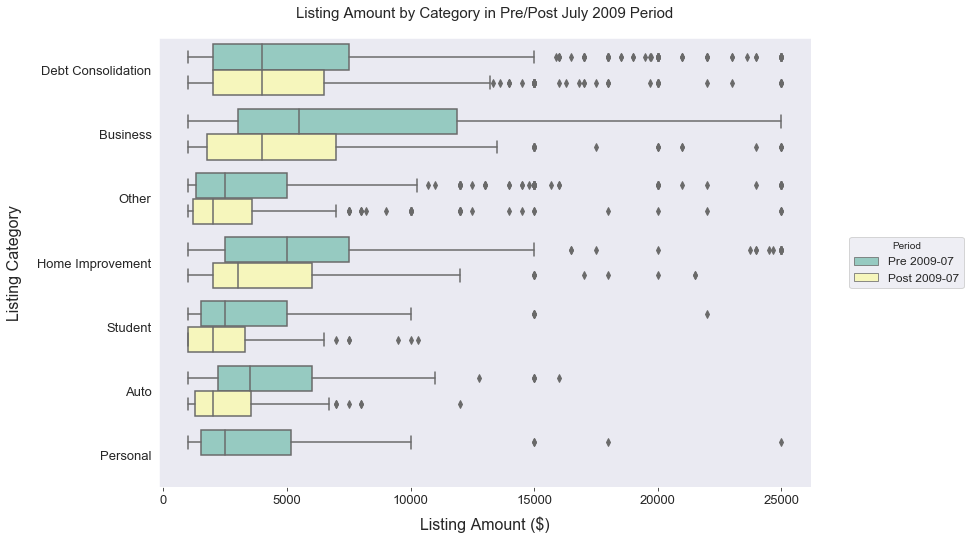

In [18]:
ax = sb.boxplot(x='LoanOriginalAmount', y='LoanCat', hue='CrRankType',
                 data=df2, palette='Set3', 
                 orient='h');

plt.legend(title='Period', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');

plt.xlabel('Listing Amount ($)', labelpad=10, fontsize=16)
plt.ylabel('Listing Category', labelpad=15, fontsize=16)
plt.title('Listing Amount by Category in Pre/Post July 2009 Period', pad=20, fontsize=15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

## Acknowledgement
Special thanks to the _**legendary**_ Udacity Data Analyst Nanodegree mentor _**Myles Callan**_, whose knowledge competency is impressively splendid, and dedication to serve students, undeniably unparalleled. I have benefited and learned a great deal from his remarkble style of coaching. 

Thank you, _**Myles**_, for the privilege to learn from you, you are simply wonderful !!!  

## Slide Run Instruction
To start this presentation, use nbconvert to export this notebook and set up a server for the slides. From the
terminal or command line, run the following expression:

 `jupyter nbconvert Communicate_Data_Findings-Prosper_Loan_Part2.ipynb --to slides --post serve --template output_toggle`

This should open a tab in your web browser where you can scroll through this presentation deck. Sub-slides can be accessed by pressing 'down' when viewing its parent slide.